In [25]:
# Hermawan - NEVTIK
import requests
import pandas
import csv
import matplotlib.pyplot as plt

In [26]:
shopee_url = "https://shopee.co.id/"
keyword_search = "asus"
limit = 50  # Max 100 (bug)
official = 1 # Change value to 1 for filterring official store

if official == 1:
    official_shop = "ShopeeMall"
else:
    official_shop = "Shopee"

csv_file = open('{}_{}_{}_CSV.csv'.format(official_shop,keyword_search,limit),'w')
csv_writer = csv.writer(csv_file)

In [27]:
headers = {
    'User-Agent' : "Mozilla/5.0 (X11; Linux x86_64; rv:68.0) Gecko/20100101 Firefox/68.0",
    'referrer' : '{}search?keyword={}'.format(shopee_url,keyword_search)
}

In [28]:
product_list,sold_list,price_list,brand_list,rating,stock,location,price_before_discount = [],[],[],[],[],[],[],[]
columns = ["Product","Brand","Location","Sold","Stock","Rating","Price_Before_Discount","Price"]

class GetID:
    def __init__(self,search,limit,official):
        API_id_url = "https://shopee.co.id/api/v2/search_items/?by=relevancy&keyword={}&limit={}&newest=0&official_mall={}&order=desc&page_type=search&version=2".format(search,limit,official)
        self.api_requests = requests.get(API_id_url,headers = headers).json()
        self.shop_id,self.item_id = [],[]
        for item in self.api_requests["items"]:
            self.item_id.append(item["itemid"])
            self.shop_id.append(item["shopid"])
            
get_item_id = GetID(keyword_search,limit,official).item_id
get_shop_id = GetID(keyword_search,limit,official).shop_id

def get_shopee():
    for index in range(len(get_item_id)):
        API_item_url = "https://shopee.co.id/api/v2/item/get?itemid={}&shopid={}".format(get_item_id[index],get_shop_id[index])
        api_requests = requests.get(API_item_url, headers=headers).json()
        yield api_requests

for i in get_shopee():
    item = i['item']
    product_list.append(item['name'])
    sold_list.append(item['historical_sold'])
    price_list.append(int(str(item['price_min'])[:-5]))
    location.append(item['shop_location'])
    rating.append(round(float(item['item_rating']['rating_star']),1))
    stock.append(item['stock'])
    brand_list.append(item['brand'])
    try: 
        price_before_discount.append(int(str(item['price_before_discount'])[:-5]))
    except: 
        price_before_discount.append(int(str(item['price_min'])[:-5]))

# Writing to CSV and Convert to Excel

In [29]:
product_detail = {"Product":product_list,"Brand":brand_list,"Location":location,"Sold":sold_list,"Stock":stock,"Rating":rating,"Price_Before_Discount":price_before_discount,"Price":price_list}

csv_writer.writerow(columns)

for item_to_csv in range(len(product_list)):
    csv_writer.writerow([product_detail["Product"][item_to_csv],
                         product_detail["Brand"][item_to_csv],
                         product_detail["Location"][item_to_csv],
                         product_detail["Sold"][item_to_csv],
                         product_detail["Stock"][item_to_csv],
                         product_detail["Rating"][item_to_csv],
                         product_detail["Price_Before_Discount"][item_to_csv],
                         product_detail["Price"][item_to_csv]
                        ])
    
csv_file.close()
read_file = pandas.read_csv ('{}_{}_{}_CSV.csv'.format(official_shop,keyword_search,limit))
read_file.to_excel ('{}_{}_{}_Excel.xlsx'.format(official_shop,keyword_search,limit), index = None, header=True)


In [30]:
dataframe = pandas.DataFrame(product_detail)
dataframe.sort_values(by=["Price_Before_Discount"],inplace=True)
dataframe

,Product,Brand,Location,Sold,Stock,Rating,Price_Before_Discount,Price
45,Power Bank Hippo Gaia SP VP 5200 mAh Garansi R...,Hippo,KOTA JAKARTA BARAT,77,6000,4.6,125000,109000
17,Power Bank Bronz X 7500 10000 12500 15000 mAh ...,Hippo,KOTA JAKARTA BARAT,204,4991,4.7,135000,119000
0,Power Bank Hippo Bronz X 7500 mAh Garansi Resmi,Hippo,KOTA JAKARTA BARAT,157,988,4.8,150000,119000
21,Power Bank Hippo Hiro 12000 6000 mAh Garansi R...,Hippo,KOTA JAKARTA BARAT,81,2996,4.8,165000,139000
29,Power Bank Hippo Smore 9000 mAh Garansi Resmi ...,Hippo,KOTA JAKARTA BARAT,2609,1988,4.8,185000,149000
13,Power Bank Smore 24000 15000 9000 mAh Garansi ...,Hippo,KOTA JAKARTA BARAT,101,3994,4.6,185000,149000
5,Power Bank Hippo Eve Plus SE 11000 mAh Garansi...,Hippo,KOTA JAKARTA BARAT,38,2998,4.7,190000,190000
49,Power Bank Hippo Bronz X 10000 mAh Garansi Res...,Hippo,KOTA JAKARTA BARAT,877,988,4.8,195000,179000
37,Power Bank iLo P2 10000 mAh Garansi Resmi,Ilo,KOTA JAKARTA BARAT,10,989,4.8,199000,169000
1,Power Bank Ilo F3 12500 mAh Garansi Resmi,Ilo,KOTA JAKARTA BARAT,389,450,4.8,199000,189000


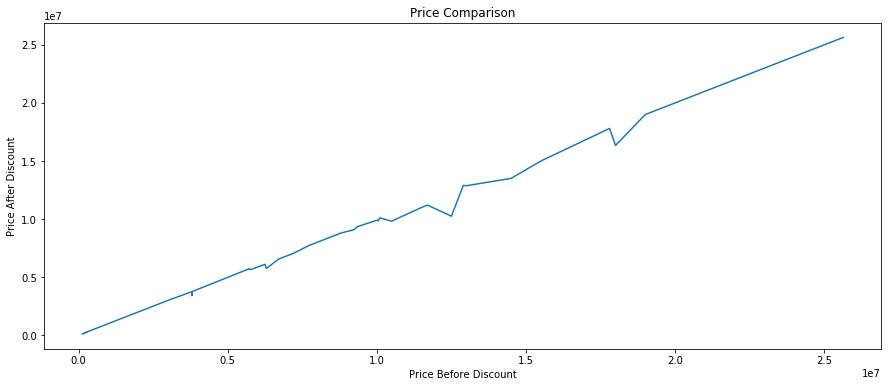

In [32]:

plt.figure(figsize=(15,6))
plt.title("Price Comparison")
plt.xlabel("Price Before Discount");plt.ylabel("Price After Discount")
plt.plot(dataframe["Price_Before_Discount"],dataframe["Price"])
# plt.scatter(dataframe["Price_Before_Discount"],dataframe["Price_Before_Discount"],alpha=0.6)
plt.show()

# Hermawan - NEVTIK Programming Division